Model Comparison
This notebook will compare two types of models on the same data.I am using a heart disease data set to create two models. 
1. Decision tree and 
2. Random forest 

We will compare the accuracy and time taken by each model to execute.


In [107]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [56]:
heart_dz= pd.read_csv('Heart_disease.csv')

In [57]:
heart_dz.head()

,age,sex,chestpain_type,resting_bp,chol,fasting_blood_sugar,restecg_result,maxheart_rate,exercice_in_angina,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


First of all let us prepare our dataset. We have to define our features and target and see the coorelation among the features using a heatmap. We then split the data into training  and testing set

In [100]:
features = heart_dz.drop(columns=[ 'target','maxheart_rate', 'chol','fasting_blood_sugar'])
target = heart_dz['target']

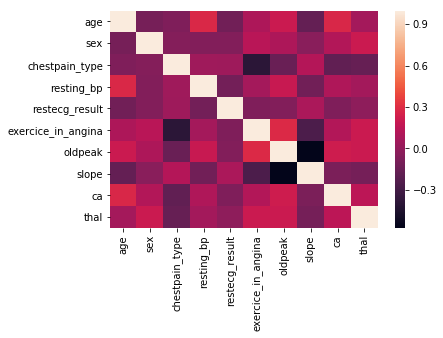

In [101]:
#Generate a heatmap
sns.heatmap(features.corr())

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 20)

In [104]:
#This is the model we will be using
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#A convenience fro displaying visualzation
from IPython.display import Image

#Packages for rendering our tree
import pydotplus
import graphviz

#Initilaize and train our tree
#Compute the time taken to execute

st = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features= 1,
    max_depth = 5,
    random_state =1337
)
decision_tree.fit(X_train, y_train)
decision_tree_scores = cross_val_score(decision_tree, X_test, y_test, cv=5)
accuracy = decision_tree_scores.mean()

print('Accuracy score:{}'.format(accuracy))

runtime = time.time()- st

print('Runtime:{} seconds'.format(runtime))





Accuracy score:0.7398601398601399
Runtime:0.015585899353027344 seconds


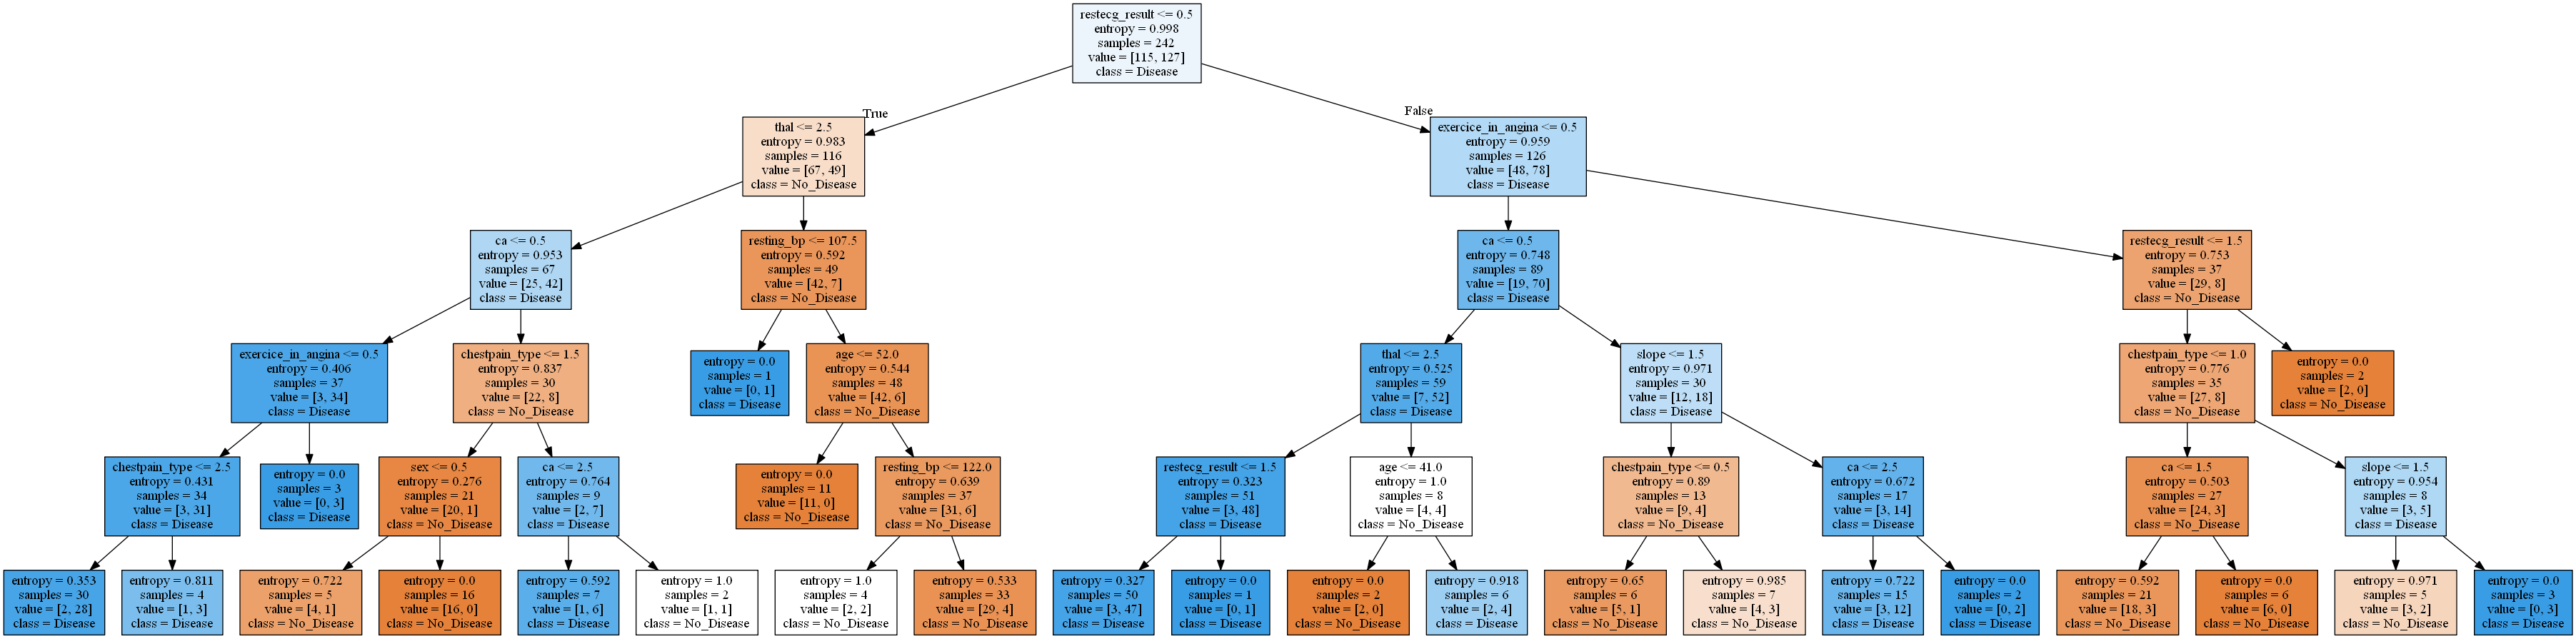

In [105]:
#Render our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names = features.columns,
    class_names = ['No_Disease', 'Disease'],
    filled =True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [106]:
#Random forest model

rm = RandomForestClassifier(criterion="entropy", random_state=1337)
rm.fit(X_train, y_train)

rm_scores = cross_val_score(rm, X_test, y_test, cv=5)
accuracy = rm_scores.mean()
print('Accuracy:{}'.format(accuracy))

runtime = time.time()- st
print('Runtime:{}'.format(runtime))

Accuracy:0.8195804195804197
Runtime:0.9127252101898193


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest model gives higher accuracy with the features given, however it looks slower than a simple decision tree.